In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
def generate_energy_data(n_samples=1000, anomaly_rate=0.1):
    
    np.random.seed(42)
    dates = pd.date_range(start='2024-01-01', periods=n_samples, freq='H')
    
    data = []
    true_labels = []  
    
    for i, date in enumerate(dates):
        hour = date.hour
        day_of_week = date.dayofweek
        month = date.month
        
        
        consumption = 100
        
        
        if 6 <= hour <= 22:
            consumption += 40 + np.random.normal(0, 8)
        else:
            consumption += 10 + np.random.normal(0, 5)
        
        
        if day_of_week >= 5:
            consumption *= 0.75
        
       
        if month in [12, 1, 2, 6, 7, 8]:
            consumption *= 1.2
        
       
        consumption += 15 * np.sin(2 * np.pi * i / (24 * 30))
        
       
        consumption += np.random.normal(0, 5)
        
       
        is_anomaly = 0
        if np.random.random() < anomaly_rate:
           
            if np.random.random() < 0.5:
                consumption *= np.random.uniform(2.0, 3.0)  
            else:
                consumption *= np.random.uniform(0.2, 0.4) 
            is_anomaly = 1
        
        data.append({
            'timestamp': date,
            'hour': hour,
            'day_of_week': day_of_week,
            'month': month,
            'consumption': max(0, consumption),
            'temperature': 20 + 15 * np.sin(2 * np.pi * i / (24 * 365)) + np.random.normal(0, 3),
            'true_anomaly': is_anomaly
        })
    
    return pd.DataFrame(data)

In [4]:
df = generate_energy_data(n_samples=1000, anomaly_rate=0.1)
print(f"Generated {len(df)} records")
print(f"True anomalies in data: {df['true_anomaly'].sum()} ({df['true_anomaly'].mean()*100:.1f}%)")
df.head()

Generated 1000 records
True anomalies in data: 105 (10.5%)


,timestamp,hour,day_of_week,month,consumption,temperature,true_anomaly
0,2024-01-01 00:00:00,0,0,1,134.288963,16.664360,0
1,2024-01-01 01:00:00,1,0,1,135.439518,23.042305,0
2,2024-01-01 02:00:00,2,0,1,132.157740,18.307377,0
3,2024-01-01 03:00:00,3,0,1,113.785412,22.883386,0
4,2024-01-01 04:00:00,4,0,1,128.017742,17.933004,0


In [5]:
print("=" * 50)
print("DATASET STATISTICS")
print("=" * 50)
print(df.describe())
print("\n" + "=" * 50)
print("DATA INFO")
print("=" * 50)
print(df.info())

DATASET STATISTICS
                           timestamp         hour  day_of_week       month  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-01-21 19:29:59.999999744    11.436000     2.976000     1.25600   
min              2024-01-01 00:00:00     0.000000     0.000000     1.00000   
25%              2024-01-11 09:45:00     5.000000     1.000000     1.00000   
50%              2024-01-21 19:30:00    11.000000     3.000000     1.00000   
75%              2024-02-01 05:15:00    17.000000     5.000000     2.00000   
max              2024-02-11 15:00:00    23.000000     6.000000     2.00000   
std                              NaN     6.913009     1.990826     0.43664   

       consumption  temperature  true_anomaly  
count  1000.000000  1000.000000   1000.000000  
mean    157.796082    25.249747      0.105000  
min      25.146496    12.292672      0.000000  
25%     127.421758    22.284643      0.000000  
50%     149.646126    25.159266      0

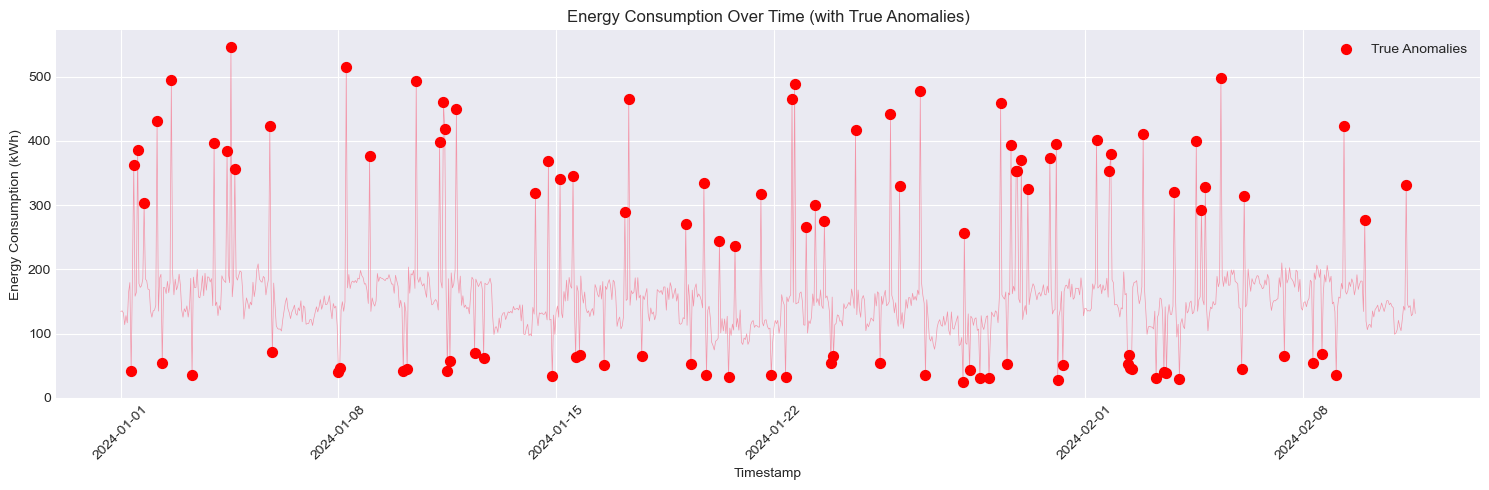

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['timestamp'], df['consumption'], linewidth=0.5, alpha=0.7)
plt.scatter(df[df['true_anomaly']==1]['timestamp'], 
           df[df['true_anomaly']==1]['consumption'], 
           color='red', s=50, label='True Anomalies', zorder=5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Over Time (with True Anomalies)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

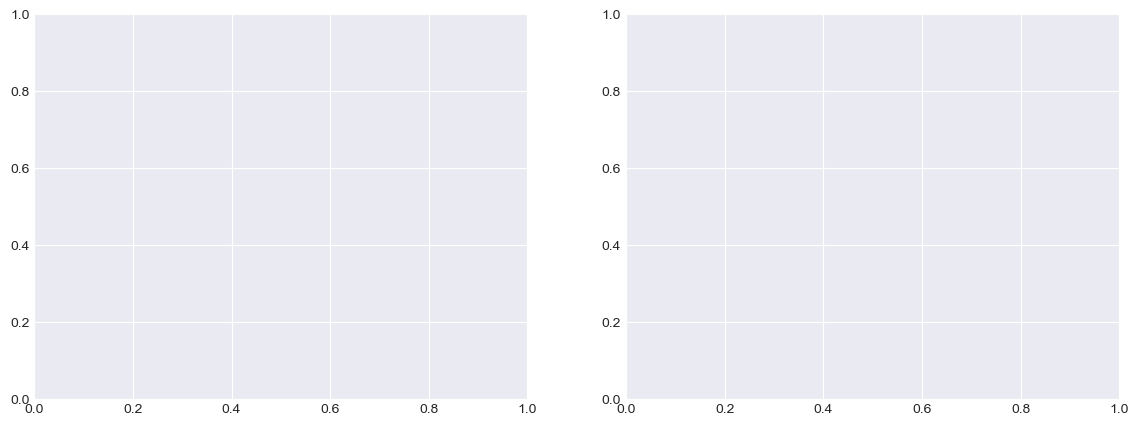

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

In [8]:
axes[0].hist(df['consumption'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Energy Consumption (kWh)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Energy Consumption')


Text(0.5, 1.0, 'Distribution of Energy Consumption')

In [9]:
axes[1].boxplot(df['consumption'])
axes[1].set_ylabel('Energy Consumption (kWh)')
axes[1].set_title('Box Plot of Energy Consumption')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

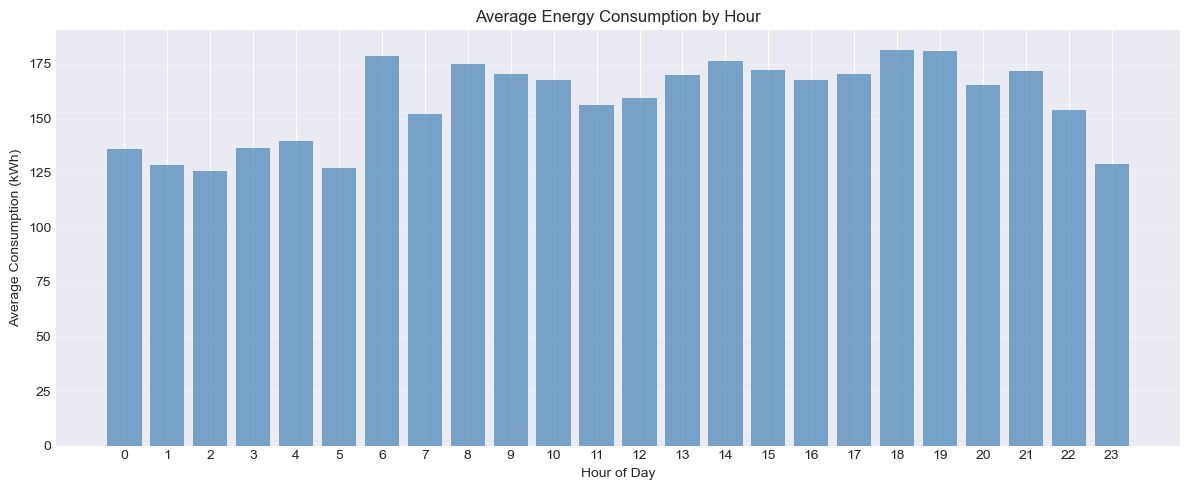

In [10]:
hourly_avg = df.groupby('hour')['consumption'].mean()

plt.figure(figsize=(12, 5))
plt.bar(hourly_avg.index, hourly_avg.values, color='steelblue', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption (kWh)')
plt.title('Average Energy Consumption by Hour')
plt.xticks(range(24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


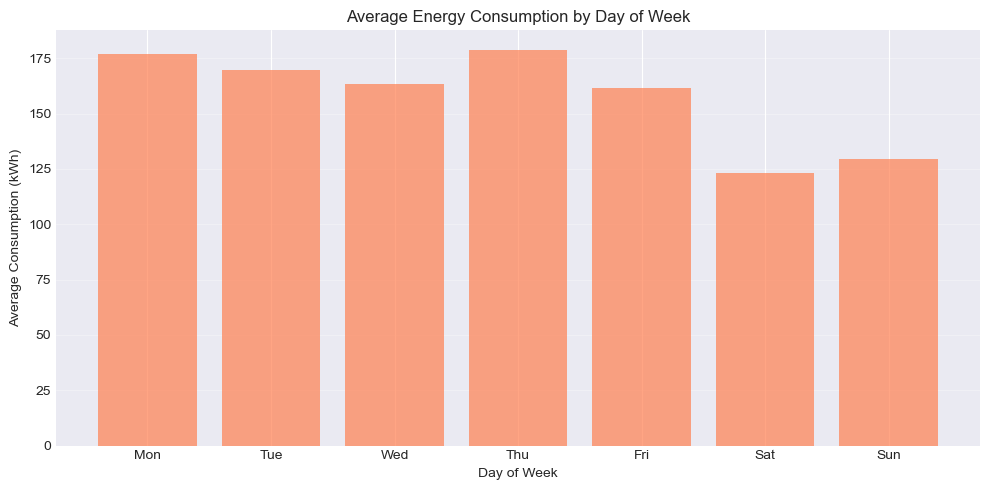

In [11]:
weekly_avg = df.groupby('day_of_week')['consumption'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 5))
plt.bar(days, weekly_avg.values, color='coral', alpha=0.7)
plt.xlabel('Day of Week')
plt.ylabel('Average Consumption (kWh)')
plt.title('Average Energy Consumption by Day of Week')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

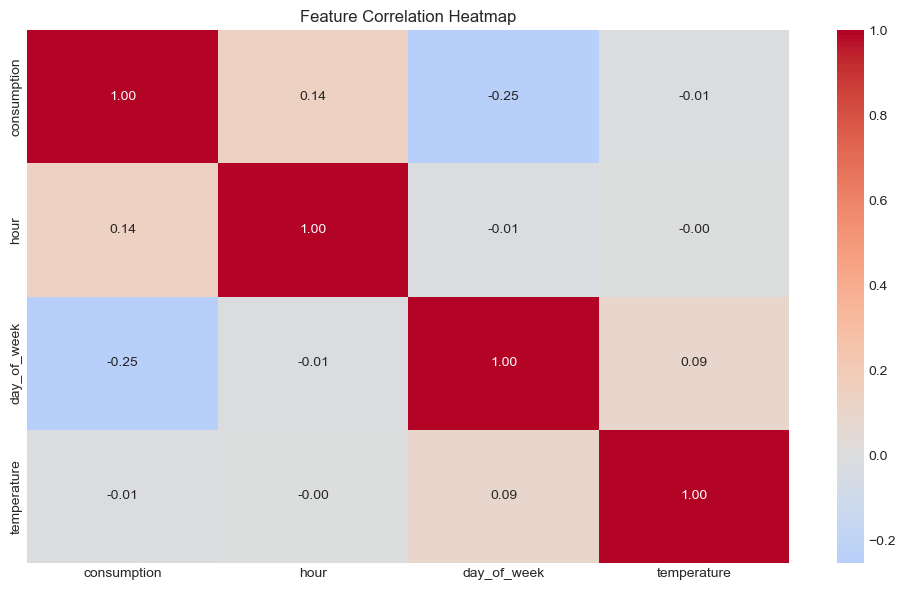

In [12]:
plt.figure(figsize=(10, 6))
correlation = df[['consumption', 'hour', 'day_of_week', 'temperature']].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [13]:
feature_columns = ['consumption', 'hour', 'day_of_week', 'temperature']
X = df[feature_columns].copy()

print("Features for anomaly detection:")
print(X.head())

Features for anomaly detection:
   consumption  hour  day_of_week  temperature
0   134.288963     0            0    16.664360
1   135.439518     1            0    23.042305
2   132.157740     2            0    18.307377
3   113.785412     3            0    22.883386
4   128.017742     4            0    17.933004


In [15]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

print("\nScaled features:")
print(X_scaled_df.head())


Scaled features:
   consumption      hour  day_of_week  temperature
0    -0.351713 -1.655100    -1.495605    -2.077266
1    -0.334498 -1.510373    -1.495605    -0.534099
2    -0.383600 -1.365646    -1.495605    -1.679732
3    -0.658486 -1.220919    -1.495605    -0.572550
4    -0.445542 -1.076191    -1.495605    -1.770313


In [18]:
iso_forest = IsolationForest(
    contamination=0.1,  
    n_estimators=100,   
    max_samples='auto',
    random_state=42,
    n_jobs=-1
)

In [19]:
print("Training Isolation Forest model...")
iso_forest.fit(X_scaled)


Training Isolation Forest model...


IsolationForest(contamination=0.1, n_jobs=-1, random_state=42)

In [20]:
predictions = iso_forest.predict(X_scaled)
anomaly_scores = iso_forest.score_samples(X_scaled)

In [21]:
df['predicted_anomaly'] = (predictions == -1).astype(int)
df['anomaly_score'] = anomaly_scores

print(f"Model trained successfully!")
print(f"Predicted anomalies: {df['predicted_anomaly'].sum()} ({df['predicted_anomaly'].mean()*100:.1f}%)")

Model trained successfully!
Predicted anomalies: 100 (10.0%)


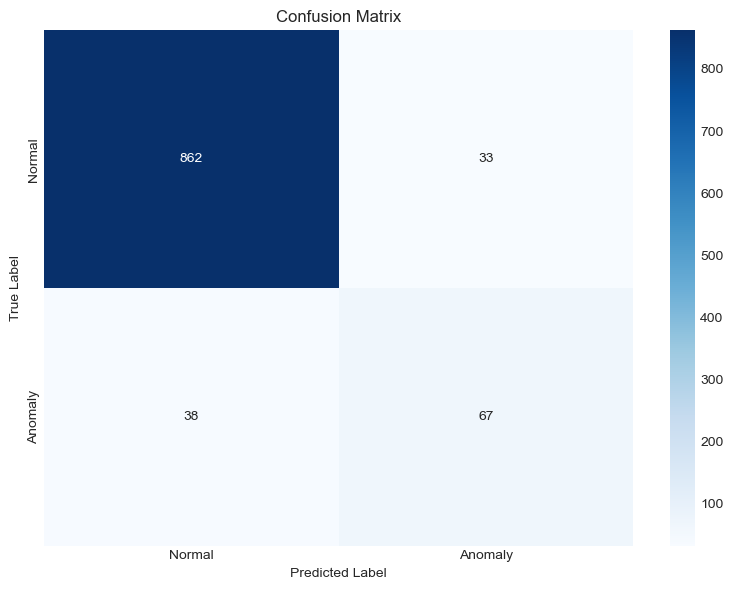

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(df['true_anomaly'], df['predicted_anomaly'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [23]:
print("=" * 60)
print("CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(df['true_anomaly'], df['predicted_anomaly'],
                          target_names=['Normal', 'Anomaly']))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Normal       0.96      0.96      0.96       895
     Anomaly       0.67      0.64      0.65       105

    accuracy                           0.93      1000
   macro avg       0.81      0.80      0.81      1000
weighted avg       0.93      0.93      0.93      1000



In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(df['true_anomaly'], df['predicted_anomaly'])
precision = precision_score(df['true_anomaly'], df['predicted_anomaly'])
recall = recall_score(df['true_anomaly'], df['predicted_anomaly'])
f1 = f1_score(df['true_anomaly'], df['predicted_anomaly'])

print("\n" + "=" * 60)
print("MODEL PERFORMANCE METRICS")
print("=" * 60)
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")
print("=" * 60)


MODEL PERFORMANCE METRICS
Accuracy:  0.929
Precision: 0.670
Recall:    0.638
F1 Score:  0.654


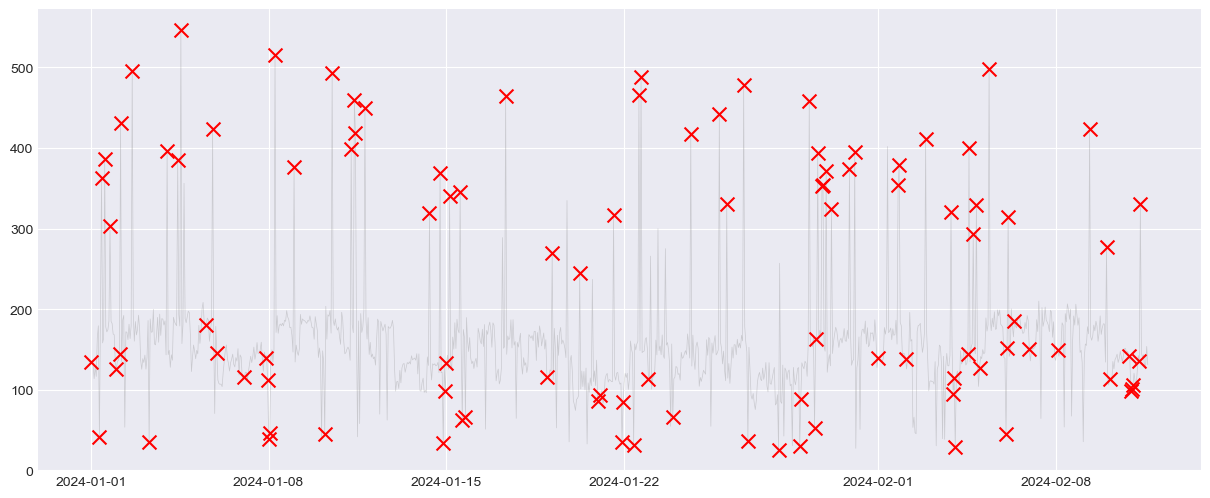

In [25]:
plt.figure(figsize=(15, 6))


plt.plot(df['timestamp'], df['consumption'], 
         linewidth=0.5, alpha=0.3, color='gray', label='All Data')


anomalies = df[df['predicted_anomaly'] == 1]
plt.scatter(anomalies['timestamp'], anomalies['consumption'],
           color='red', s=100, marker='x', label='Predicted Anomalies', zorder=5)


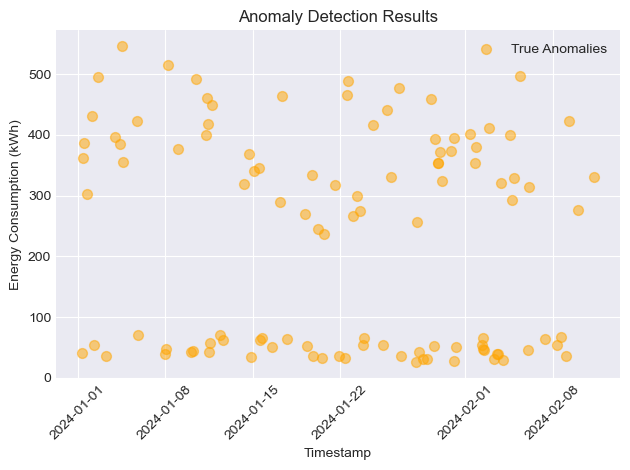

In [26]:
true_anomalies = df[df['true_anomaly'] == 1]
plt.scatter(true_anomalies['timestamp'], true_anomalies['consumption'],
           color='orange', s=50, marker='o', alpha=0.5, 
           label='True Anomalies', zorder=4)

plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Anomaly Detection Results')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

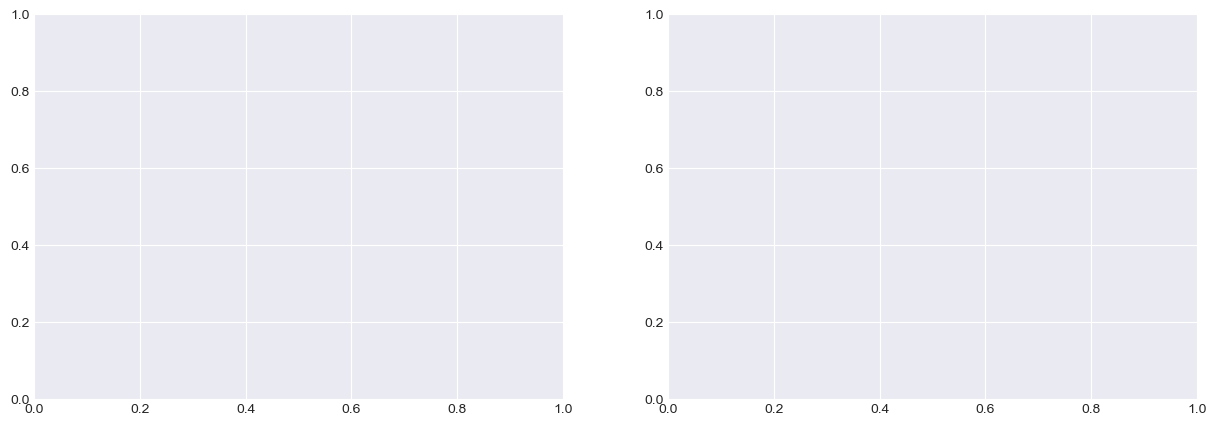

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

In [28]:
axes[0].hist(df[df['predicted_anomaly']==0]['anomaly_score'], 
            bins=50, alpha=0.7, label='Normal', color='blue')
axes[0].hist(df[df['predicted_anomaly']==1]['anomaly_score'], 
            bins=50, alpha=0.7, label='Anomaly', color='red')
axes[0].set_xlabel('Anomaly Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Anomaly Scores')
axes[0].legend()
axes[0].axvline(x=df['anomaly_score'].quantile(0.1), 
               color='green', linestyle='--', label='Threshold')

In [29]:
axes[1].scatter(df[df['predicted_anomaly']==0]['consumption'],
               df[df['predicted_anomaly']==0]['anomaly_score'],
               alpha=0.5, s=10, label='Normal', color='blue')
axes[1].scatter(df[df['predicted_anomaly']==1]['consumption'],
               df[df['predicted_anomaly']==1]['anomaly_score'],
               alpha=0.7, s=50, label='Anomaly', color='red', marker='x')
axes[1].set_xlabel('Energy Consumption (kWh)')
axes[1].set_ylabel('Anomaly Score')
axes[1].set_title('Consumption vs Anomaly Score')
axes[1].legend()

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [30]:
print("=" * 60)
print("TOP 10 ANOMALIES (Lowest Anomaly Scores)")
print("=" * 60)
top_anomalies = df[df['predicted_anomaly']==1].nsmallest(10, 'anomaly_score')
print(top_anomalies[['timestamp', 'consumption', 'hour', 'anomaly_score']])

TOP 10 ANOMALIES (Lowest Anomaly Scores)
              timestamp  consumption  hour  anomaly_score
520 2024-01-22 16:00:00   488.341240    16      -0.683929
174 2024-01-08 06:00:00   515.918798     6      -0.671432
679 2024-01-29 07:00:00   458.670666     7      -0.667649
849 2024-02-05 09:00:00   497.633739     9      -0.665203
82  2024-01-04 10:00:00   384.710327    10      -0.635472
617 2024-01-26 17:00:00   477.759784    17      -0.631776
39  2024-01-02 15:00:00   494.938355    15      -0.630085
72  2024-01-04 00:00:00   396.544986     0      -0.627962
695 2024-01-29 23:00:00   371.124883    23      -0.627743
18  2024-01-01 18:00:00   303.305534    18      -0.627380


In [31]:
output_file = 'energy_anomalies_detected.csv'
df.to_csv(output_file, index=False)
print(f"Results saved to '{output_file}'")

Results saved to 'energy_anomalies_detected.csv'


In [32]:
import joblib
model_file = 'isolation_forest_model.pkl'
joblib.dump(iso_forest, model_file)
joblib.dump(scaler, 'scaler.pkl')
print(f"Model saved to '{model_file}'")

Model saved to 'isolation_forest_model.pkl'
